In [ ]:
C:\Users\atchaya\Downloads\dataset\Freshwater Fish Disease Aquaculture in south asia

In [1]:
import tensorflow as tf
print(tf.__version__)



2.15.0


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
pip uninstall keras -y


Found existing installation: keras 3.5.0
Uninstalling keras-3.5.0:
  Successfully uninstalled keras-3.5.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

train_dir = 'dataset/Freshwater Fish Disease Aquaculture in south asia/Train'
test_dir  = 'dataset/Freshwater Fish Disease Aquaculture in south asia/Test'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),     # DenseNet expects 224x224
    batch_size=128,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=128,
    class_mode='categorical'
)


Found 1747 images belonging to 7 classes.
Found 697 images belonging to 7 classes.




Epoch 1/10


14/14 [==============================] - 352s 24s/step - loss: 1.6486 - accuracy: 0.3698 - val_loss: 1.1519 - val_accuracy: 0.6327
Epoch 2/10
14/14 [==============================] - 284s 21s/step - loss: 1.0685 - accuracy: 0.6480 - val_loss: 0.8362 - val_accuracy: 0.7360
Epoch 3/10
14/14 [==============================] - 325s 24s/step - loss: 0.7913 - accuracy: 0.7567 - val_loss: 0.6394 - val_accuracy: 0.8049
Epoch 4/10
14/14 [==============================] - 310s 23s/step - loss: 0.6221 - accuracy: 0.8168 - val_loss: 0.5524 - val_accuracy: 0.8393
Epoch 5/10
14/14 [==============================] - 303s 22s/step - loss: 0.5173 - accuracy: 0.8500 - val_loss: 0.4415 - val_accuracy: 0.8924
Epoch 6/10
14/14 [==============================] - 327s 24s/step - loss: 0.4235 - accuracy: 0.8947 - val_loss: 0.3690 - val_accuracy: 0.9168
Epoch 7/10
14/14 [==============================] - 294s 21s/step - loss: 0.3685 - accuracy: 0.9124 - val_loss: 0.3373 - val_accuracy: 0.9240
Ep

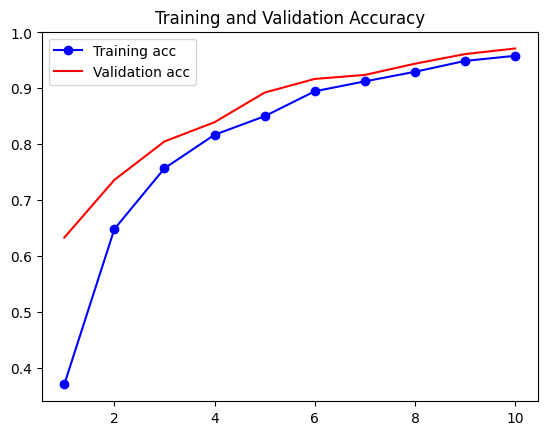

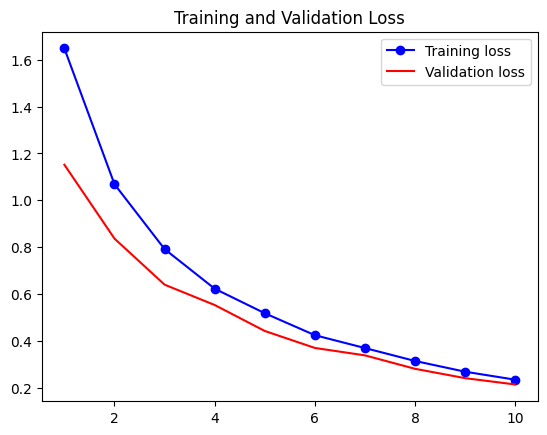

In [4]:


# ----------------------------
# Model: DenseNet201
# ----------------------------
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False

# ----------------------------
# Compile Model
# ----------------------------
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# ----------------------------
# Train Model
# ----------------------------
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator),
    verbose=1
)

# ----------------------------
# Plot Training History
# ----------------------------
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure()
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs, acc, 'bo-', label='Training acc')
    plt.plot(epochs, val_acc, 'r-', label='Validation acc')
    plt.legend()
    plt.show()

    plt.figure()
    plt.title('Training and Validation Loss')
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation loss')
    plt.legend()
    plt.show()

    return acc, val_acc, loss, val_loss

acc, val_acc, loss, val_loss = plot_history(history)


In [7]:
print(train_generator.class_indices)


{'Bacterial Red disease': 0, 'Bacterial diseases - Aeromoniasis': 1, 'Bacterial gill disease': 2, 'Fungal diseases Saprolegniasis': 3, 'Healthy Fish': 4, 'Parasitic diseases': 5, 'Viral diseases White tail disease': 6}


In [5]:
model.save('densenet201_transfer.hdf5')
print("Success")

C:\Users\atchaya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Success


In [6]:
model.save_weights('densenet201_transfer_weights.hdf5')
print("Success")

Success
